In [16]:

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [28]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

print(f"Original shape {X_train.shape}")
print(f"trancformed shape{X_train_pca.shape}")

Original shape (60000, 784)
trancformed shape(60000, 50)


In [32]:
pca.explained_variance_ratio_.sum()

np.float64(0.8246468633334725)

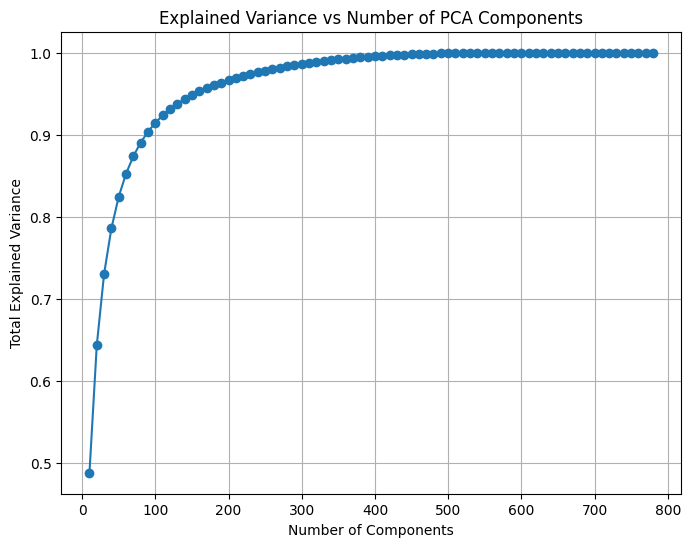

In [36]:
import numpy as np

n_list = []
exp_var_list = []

# Example: test every 10th component (1, 10, 20, ..., 780)
for i in range(10, X_train.shape[1]+1, 10):  # step=10
    pca = PCA(n_components=i)
    pca.fit(X_train)

    var_exp = pca.explained_variance_ratio_.sum()
    n_list.append(i)
    exp_var_list.append(var_exp)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(n_list, exp_var_list, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.show()


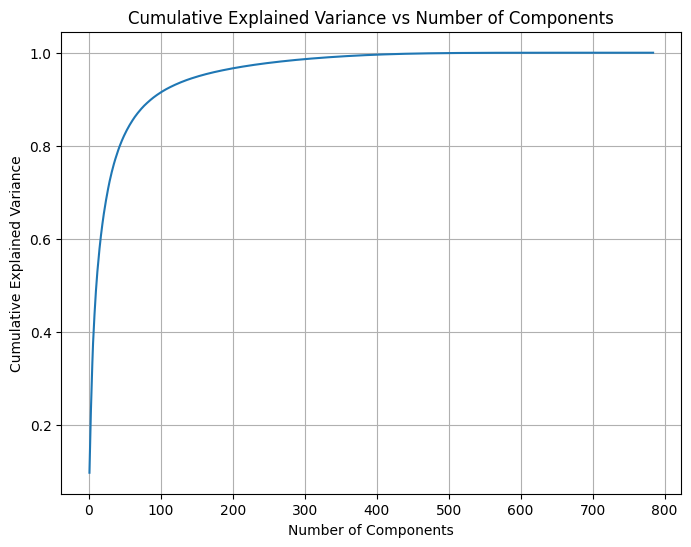

In [38]:
pca = PCA().fit(X_train)  # no n_components → fit full PCA

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


In [42]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit(X_test)

In [43]:
print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {X_train_pca.shape}")
print(f"Number of components selected: {pca.n_components_}")

Original shape: (60000, 784)
Reduced shape: (60000, 154)
Number of components selected: 149


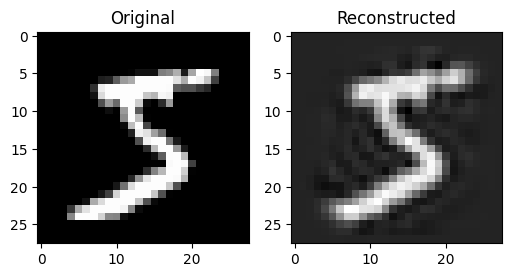

In [51]:
# Fit PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Now inverse_transform works — SAME pca object!
reconstruct_data = pca.inverse_transform(X_train_pca)

# Plot example
index = 0

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(reconstruct_data[index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed')

plt.show()


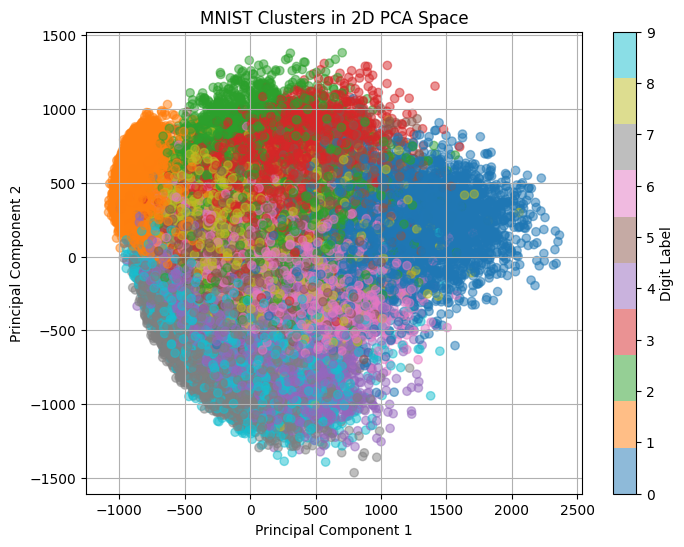

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1️⃣ Fit PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# 2️⃣ Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train.astype(int),           # color by label
    cmap='tab10',
    alpha=0.5
)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Clusters in 2D PCA Space')
plt.grid(True)
plt.show()


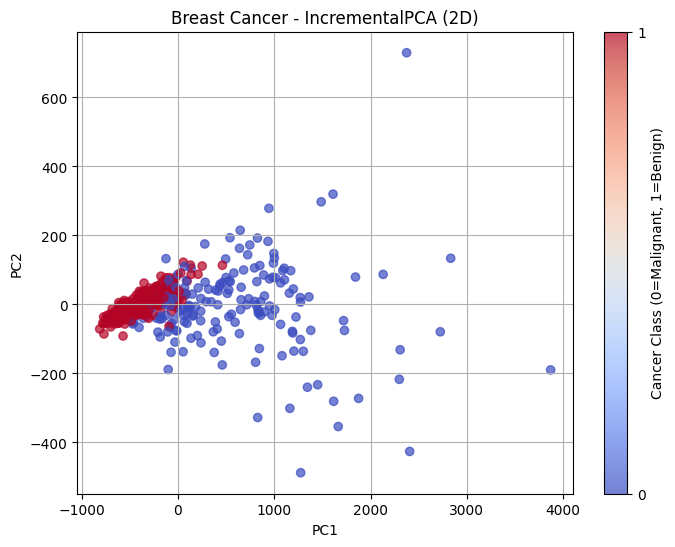

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize IncrementalPCA
ipca = IncrementalPCA(n_components=2, batch_size=10)

# Fit IncrementalPCA on training data
X_train_ipca = ipca.fit_transform(X_train)

# Transform test data
X_test_ipca = ipca.transform(X_test)

# Plot train data in 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_ipca[:, 0], X_train_ipca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], label='Cancer Class (0=Malignant, 1=Benign)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer - IncrementalPCA (2D)')
plt.grid(True)
plt.show()


In [74]:
# Use PCA As preprocassion, compare accuracy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(X_train, y_train )

svc_pca = SVC()
svc_pca.fit(X_train_ipca, y_train)

acc = accuracy_score(y_test, svc.predict(X_test))
acc_pca = accuracy_score(y_test, svc_pca.predict(X_test_ipca))

print(f"Accuracy of orig data: {acc}")
print(f"Accuracy of pre processed data: {acc_pca}")


Accuracy of orig data: 0.9473684210526315
Accuracy of pre processed data: 0.9473684210526315


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [87]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1️⃣ Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# 2️⃣ Get features and target
X = bank_marketing.data.features
y = bank_marketing.data.targets.to_numpy().ravel()

# 3️⃣ Encode categoricals
X_encoded = pd.get_dummies(X, drop_first=True)

# 4️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5️⃣ Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),           # must instantiate
    ('pca', PCA(n_components=10)),           # example with 10 components
    ('logreg', LogisticRegression(max_iter=1000))  # max_iter for convergence
])

# 6️⃣ Fit pipeline
pipe.fit(X_train, y_train)

# 7️⃣ Predict
y_pred = pipe.predict(X_test)

# 8️⃣ Evaluate
acc = accuracy_score(y_test, y_pred)
print(f'Pipeline Accuracy: {acc:.4f}')


Pipeline Accuracy: 0.8844


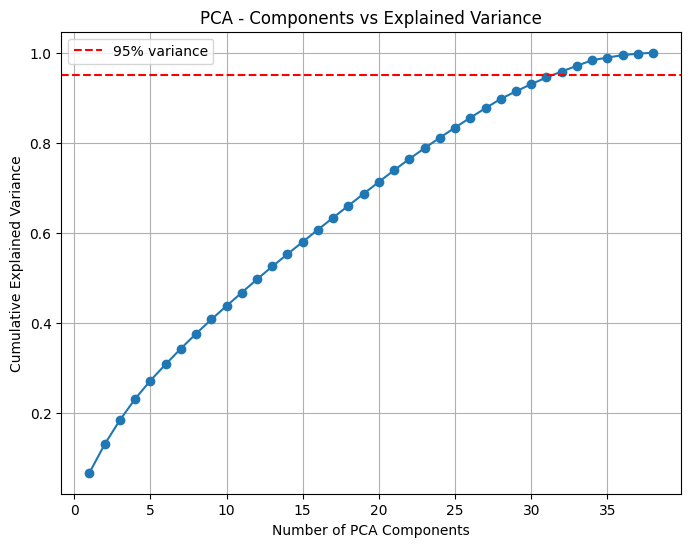

In [94]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Scale data first → PCA likes scaled data!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Fit PCA (no n_components → full)
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Components vs Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


In [104]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Prepare data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 2️⃣ Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # no n_components yet — we will grid search it
    ('logreg', LogisticRegression(max_iter=1000))
])

# 3️⃣ Set parameter grid
param_grid = {
    'pca__n_components': [35],        # test different PCA sizes
    'logreg__C': [0.01, 0.1, 1, 10, 100, 1000]                 # test different regularization strengths
}

# 4️⃣ Set up GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

# 5️⃣ Fit grid search
grid.fit(X_train, y_train)

# 6️⃣ Best params
print(f'Best params: {grid.best_params_}')
print(f'Best CV score: {grid.best_score_:.4f}')

# 7️⃣ Evaluate on test set
y_pred = grid.best_estimator_.predict(X_test)

print(f'\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............logreg__C=0.01, pca__n_components=35; total time=   0.4s
[CV] END ...............logreg__C=0.01, pca__n_components=35; total time=   0.4s
[CV] END ...............logreg__C=0.01, pca__n_components=35; total time=   0.4s
[CV] END ...............logreg__C=0.01, pca__n_components=35; total time=   0.4s
[CV] END ...............logreg__C=0.01, pca__n_components=35; total time=   0.5s
[CV] END ................logreg__C=0.1, pca__n_components=35; total time=   0.5s
[CV] END ................logreg__C=0.1, pca__n_components=35; total time=   0.5s
[CV] END ................logreg__C=0.1, pca__n_components=35; total time=   0.5s
[CV] END ................logreg__C=0.1, pca__n_components=35; total time=   0.5s
[CV] END ................logreg__C=0.1, pca__n_components=35; total time=   0.5s
[CV] END ..................logreg__C=1, pca__n_components=35; total time=   0.5s
[CV] END ..................logreg__C=1, pca__n_co

In [109]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, eps = 5_000 ,0.1
d = johnson_lindenstrauss_min_dim(m, eps = eps)
d

np.int64(7300)

In [111]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)

X = np.random.randn(m, n)
X_reduced = X @ P.T

In [113]:
from sklearn.random_projection import  GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps = eps, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)

In [ ]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

p00